In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/times.ttf')
plt.rc('font',family='Times New Roman')

/tmp/ipykernel_1354288/656686961.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


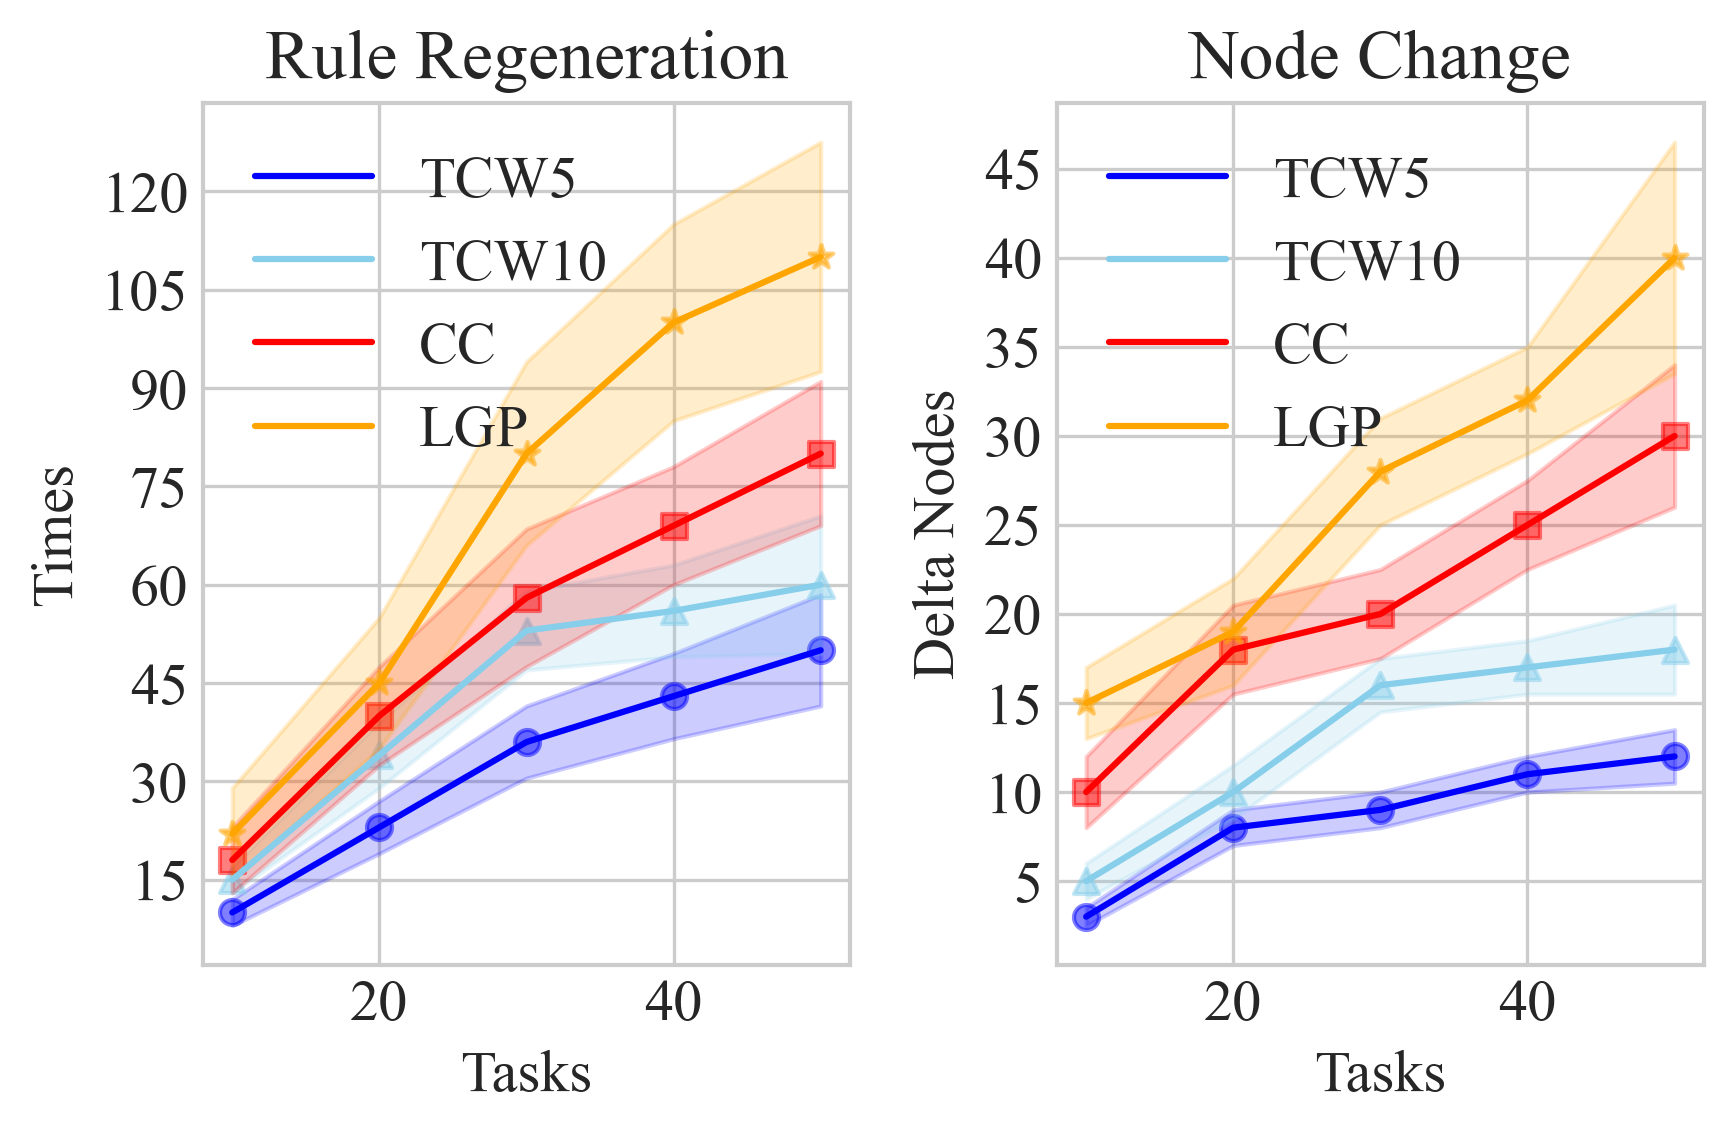

In [143]:
def genlu(mean, std):
    mean = np.array(mean)
    std = np.array(std)
    half_reward_std = std / 2.0
    lower = [x - y for x, y in zip(mean, half_reward_std)]
    upper = [x + y for x, y in zip(mean, half_reward_std)]
    return lower, upper, mean

def rule_plot(ax, mean, std, color, label, marker):
    lower, upper, mean= genlu(mean, std)
    xaxis = [10,20,30,40,50]
    ax.plot(xaxis, mean, color=color, label=label)
    ax.scatter(xaxis, mean, color=color, marker=marker, alpha=0.5)
    ax.fill_between(xaxis, lower, upper, color=color, alpha=0.2)
    ax.set_xlabel('Tasks')
    ax.set_ylabel('Times')
    ax.set_title('Rule Regeneration')
    # ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.legend()
    
def node_plot(ax, mean, std, color, label, marker):
    lower, upper, mean= genlu(mean, std)
    xaxis = [10,20,30,40,50]
    ax.plot(xaxis, mean, color=color, label=label)
    ax.scatter(xaxis, mean, color=color, marker=marker, alpha=0.5)
    ax.fill_between(xaxis, lower, upper, color=color, alpha=0.2)
    ax.set_xlabel('Tasks')
    ax.set_ylabel('Delta Nodes')
    ax.set_title('Node Change')
    # ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.legend()

fig, ax =plt.subplots(1,2,constrained_layout=True, figsize=(6, 4),dpi=300)


plt.subplot(1, 2, 1)
rule_plot(ax[0], [10,23,36,43,50], [4, 8, 11,13, 17], "blue", "TCW5", "o")
rule_plot(ax[0], [15,34,53,56,60], [4, 10, 12,14,21], "skyblue", "TCW10", "^")
rule_plot(ax[0], [18,40,58,69,80], [10, 15, 21,18, 22], "red", "CC", "s")
rule_plot(ax[0], [22,45,80,100,110], [14, 20, 28,30,35], "orange", "LGP", "*")

plt.subplot(1, 2, 2)
node_plot(ax[1], [3,8,9,11,12], [1, 2, 2, 2,3], "blue", "TCW5", "o")
node_plot(ax[1], [5,10,16,17,18], [2, 3, 3, 3,5], "skyblue", "TCW10", "^")
node_plot(ax[1], [10,18,20,25,30], [4, 5,5,5,8], "red", "CC", "s")
node_plot(ax[1], [15,19,28,32,40], [4, 6, 6, 6,13], "orange", "LGP", "*")

plt.rcParams.update({'font.size': 14})
plt.tight_layout()
plt.savefig("fig.regeneration.svg", bbox_inches='tight')
plt.savefig("fig.regeneration.jpg", bbox_inches='tight', dpi=300)
plt.show()